In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

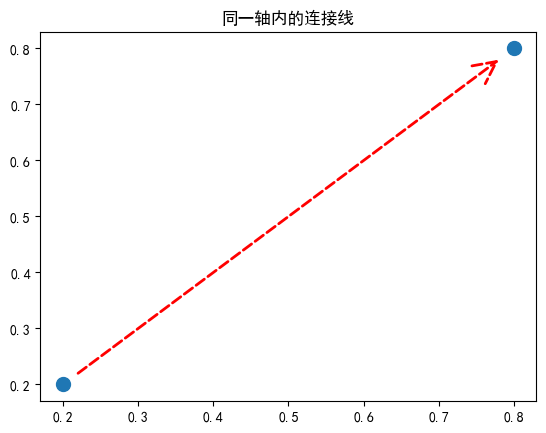

In [3]:
from matplotlib.patches import ConnectionPatch

# 创建图形和轴
fig, ax = plt.subplots(1, 1)

# 添加一些示例元素
ax.plot([0.2, 0.8], [0.2, 0.8], 'o', markersize=10)

# 创建连接线对象（ConnectionPatch实例）
con = ConnectionPatch(
    xyA=(0.22, 0.22),  # 起点坐标
    xyB=(0.78, 0.78),  # 终点坐标
    coordsA='data',    # 起点使用数据坐标系
    coordsB='data',    # 终点使用数据坐标系
    axesA=ax,          # 起点所在的子图
    axesB=ax,          # 终点所在的子图
    arrowstyle='->',   # 箭头样式
    mutation_scale=40, # 箭头大小缩放比例（值越大箭头越大）
    linestyle='--',    # 线条样式
    linewidth=2,       # 线条宽度
    color='red'        # 箭头颜色
)

# 将创建的连接线添加到子图中，使其可见
ax.add_artist(con)

plt.title('同一轴内的连接线')
plt.show()

# 2、使用示例：

### 示例 1：跨子图连接

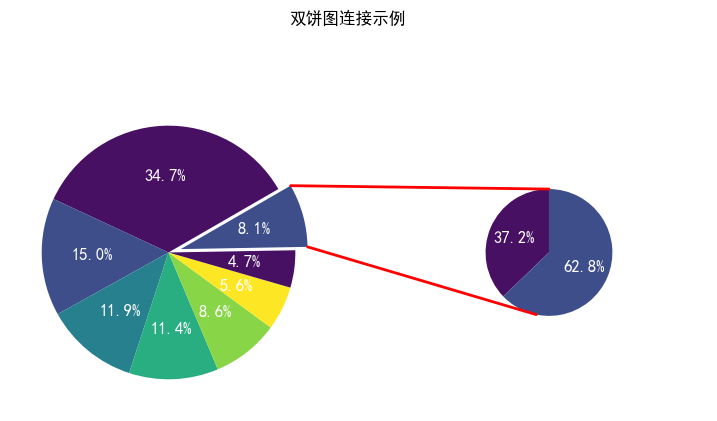

In [4]:
from matplotlib.patches import ConnectionPatch
from matplotlib import cm

# 准备数据
size = [219324, 94739, 75146, 71831, 54051, 35458, 29990, 50843]
explode = (0, 0, 0, 0, 0, 0, 0, 0.1)  # 突出最后一块

size2 = [12255, 20706]

# 创建画布和子图
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)  # 左侧子图
ax2 = fig.add_subplot(122)  # 右侧子图

# 绘制大饼图
ax1.pie(size, autopct='%1.1f%%', startangle=30,textprops=dict(color="white", fontsize=12, weight="bold"),
        colors=cm.viridis(range(10, 300, 50)), explode=explode)

# 绘制小饼图
ax2.pie(size2, autopct='%1.1f%%', startangle=90,textprops=dict(color="white", fontsize=12, weight="bold"),
        colors=cm.viridis(range(10, 300, 50)), radius=0.5, shadow=False)

# 计算连接线位置
theta1, theta2 = ax1.patches[-1].theta1, ax1.patches[-1].theta2
center, r = ax1.patches[-1].center, ax1.patches[-1].r

# 创建第一条连接线（上边缘）
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con1 = ConnectionPatch(xyA=(0, 0.5), xyB=(x, y),
                       coordsA=ax2.transData, coordsB=ax1.transData,
                       axesA=ax2, axesB=ax1, linewidth=2, color='red')
fig.add_artist(con1)

# 创建第二条连接线（下边缘）
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con2 = ConnectionPatch(xyA=(-0.1, -0.49), xyB=(x, y),
                       coordsA='data', coordsB='data',
                       axesA=ax2, axesB=ax1, linewidth=2, color='red')
fig.add_artist(con2)

plt.suptitle('双饼图连接示例')
plt.show()

### 示例 2：连接图形元素（Patch）

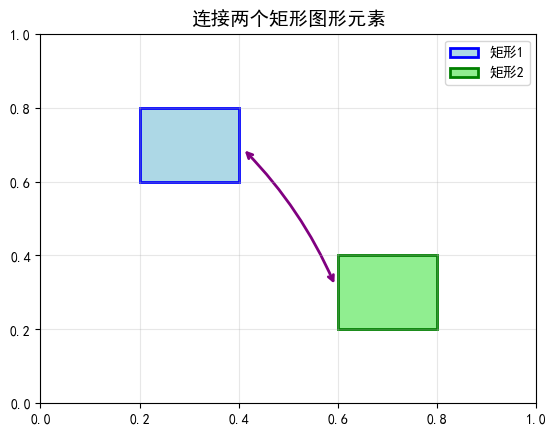

In [5]:
from matplotlib.patches import Rectangle,ConnectionPatch

# 创建子图
fig, ax = plt.subplots()

# 绘制第一个矩形（PatchA）
rect1 = Rectangle(
    (0.2, 0.6),  # 左下角坐标
    0.2, 0.2,    # 宽度和高度
    facecolor='lightblue',
    edgecolor='blue',
    linewidth=2,
    label='矩形1'
)
ax.add_patch(rect1)

# 绘制第二个矩形（PatchB）
rect2 = Rectangle(
    (0.6, 0.2),  # 左下角坐标
    0.2, 0.2,    # 宽度和高度
    facecolor='lightgreen',
    edgecolor='green',
    linewidth=2,
    label='矩形2'
)
ax.add_patch(rect2)

# 创建连接两个矩形的ConnectionPatch
conn = ConnectionPatch(
    xyA=(0.4, 0.7),  # 起始点（矩形1的右侧中点）
    xyB=(0.6, 0.3),  # 终点（矩形2的左侧中点）
    coordsA='data',
    coordsB='data',
    patchA=rect1,  # 关联起始矩形
    patchB=rect2,  # 关联终点矩形
    shrinkA=5,
    shrinkB=5, 
    arrowstyle='<->', 
    connectionstyle='arc3, rad=-0.1',
    color='purple',
    linewidth=2
)

ax.add_artist(conn)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('连接两个矩形图形元素', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

### 示例 3：连接样式与箭头样式

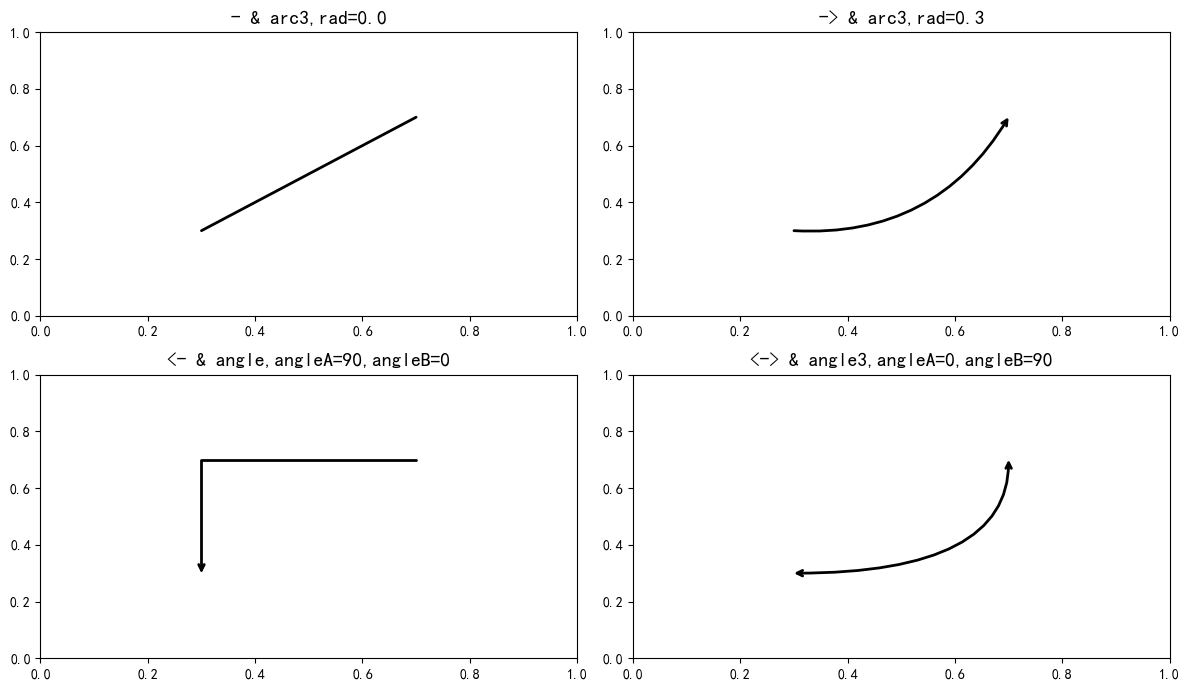

In [6]:
from matplotlib.patches import ConnectionPatch

# 多种箭头样式
arrow_styles = [
    '-',       # 无箭头
    '->',      # 简单右箭头
    '<-',      # 简单左箭头
    '<->',     # 双向箭头
]
# 多种连接样式
connection_styles = [
    'arc3,rad=0.0',              # 直线连接
    'arc3,rad=0.3',              # 弯曲连接
    'angle,angleA=90,angleB=0',  # 直角连接
    'angle3,angleA=0,angleB=90'  # 分段连接
]

fig, axs = plt.subplots(2, 2, figsize=(12, 7))
axs = axs.ravel()

for i in range(len(connection_styles)):
    # 创建带有所需连接样式的连接线
    con = ConnectionPatch(xyA=(0.3, 0.3), xyB=(0.7, 0.7),
                          coordsA='data', coordsB='data',
                          axesA=axs[i], axesB=axs[i],
                          arrowstyle=arrow_styles[i], 
                          linewidth=2,
                          connectionstyle=connection_styles[i]
                         )
    
    axs[i].add_artist(con)
    axs[i].set_title(f'{arrow_styles[i]} & {connection_styles[i]}', fontsize=14)
    axs[i].set_xlim(0, 1)
    axs[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

### 示例 4：使用约束布局的注意事项

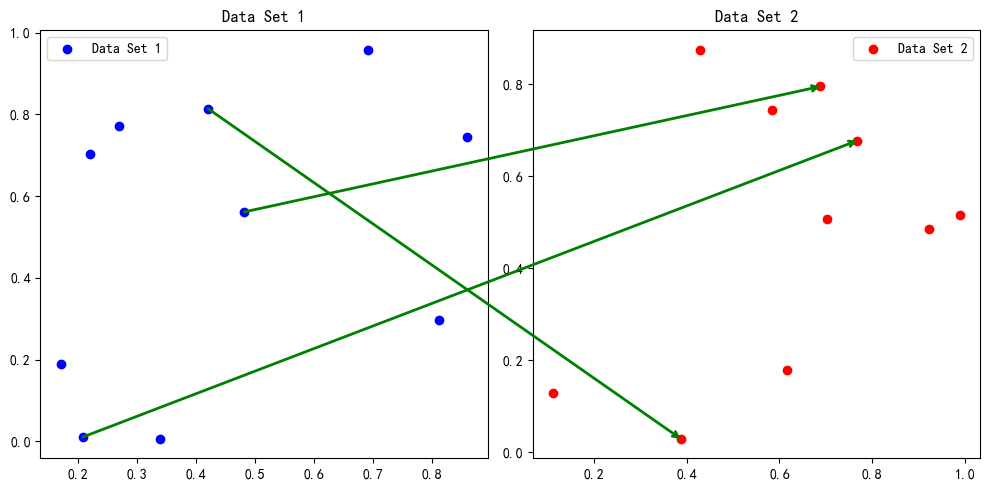

In [7]:
from matplotlib.patches import ConnectionPatch

# 创建图形和子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# 生成随机数据
np.random.seed(22)
x1, y1 = np.random.rand(10), np.random.rand(10)
x2, y2 = np.random.rand(10), np.random.rand(10)

# 绘制散点图
ax1.scatter(x1, y1, color='blue', label='Data Set 1')
ax2.scatter(x2, y2, color='red', label='Data Set 2')

# 绘制连接线
for i in range(3):
    xyA = (x1[i], y1[i])
    xyB = (x2[i], y2[i])
    con = ConnectionPatch(
        xyA=xyA, xyB=xyB,
        coordsA="data", coordsB="data",
        axesA=ax1, axesB=ax2,
        arrowstyle="->",
        connectionstyle="arc3",
        color="green",
        linewidth=2
    )
    # ====将连接线添加到图形而不是轴====
    fig.add_artist(con)

# 添加图例和标题
ax1.legend()
ax2.legend()
ax1.set_title('Data Set 1')
ax2.set_title('Data Set 2')

plt.tight_layout()
plt.show()